-> Evaluasi model yang disimpan di directory model


In [1]:
import joblib
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [2]:
# baca/load model di directory model
model = joblib.load(r"C:\Users\ASUS\OneDrive\Documents\RegresiProject\model\linear_regression_model.pkl")
print("Model berhasil diLoad")

Model berhasil diLoad


In [7]:
#load data y_test dan X_test
X_test = pd.read_csv(r"C:\Users\ASUS\OneDrive\Documents\RegresiProject\data\processed\X_test.csv")
y_test = pd.read_csv(r"C:\Users\ASUS\OneDrive\Documents\RegresiProject\data\processed\y_test.csv")
print("data berhasil diLoad")

data berhasil diLoad


In [11]:
# Lakukan preprocessing yang sama pada X_test sebelum prediksi
def process_data(df):
    if 'Tanggal_Gabungan' in df.columns:
        df['Tanggal_Gabungan'] = pd.to_datetime(df['Tanggal_Gabungan'], errors='coerce')
        # Konversi ke integer (timestamp Unix)
        df['Tanggal_Gabungan'] = df['Tanggal_Gabungan'].astype(np.int64) // 10**9
    return df

# Terapkan fungsi preprocessing pada X_test
X_test = process_data(X_test)
# Pastikan tipe data X_test sudah numerik
X_test = X_test.select_dtypes(include=np.number)

# Sekarang, prediksi akan berhasil
y_pred = model.predict(X_test)

In [12]:
# Evaluasi model dengan metrik MSE dan R²
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)    
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")




Mean Squared Error: 6814466049.185858
R² Score: 0.9612025533023513


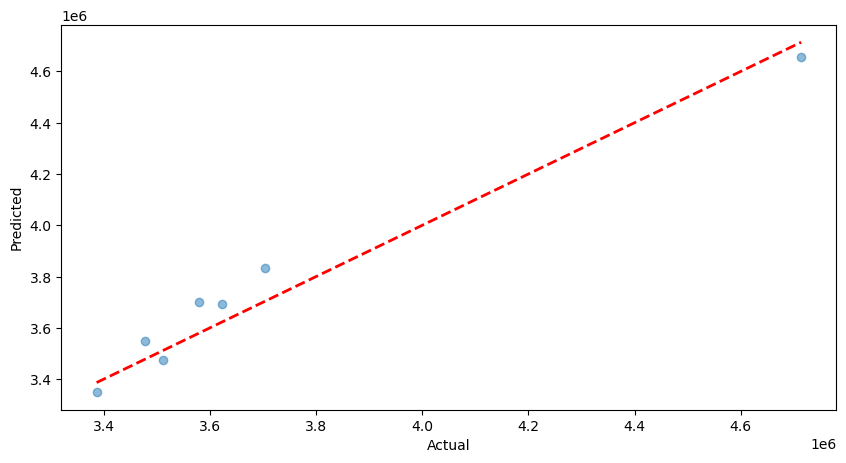

In [ ]:
# Visualiasi hasil prediksi vs aktual
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()